# Calculate Popularity based on streams

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import time
from pandas.plotting import scatter_matrix
from sklearn import datasets, svm, tree, preprocessing, metrics

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [116]:
# Import tha data set.
data = pd.read_csv("../../data/cleanedDataSetWithGenres.csv")

In [3]:
data.head()

,Unnamed: 0,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0,Pop
1,1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Pop
2,2,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Pop
3,3,7 rings,1,2019-03-16,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,Indonesia,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Rap
4,4,Shape of You,1,2017-03-08,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Portugal,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,R&B


In [117]:
# Drop unnamed column with old index.
data.drop('Unnamed: 0', inplace=True, axis=1)

In [118]:
# Show quantiles of streams.
data['streams'].describe()

count    9.176000e+03
mean     2.112542e+05
std      3.789472e+05
min      1.083000e+03
25%      1.928825e+04
50%      8.060700e+04
75%      2.534140e+05
max      8.611591e+06
Name: streams, dtype: float64

In [6]:
quantiles = data["streams"].quantile([0, 0.5, 1])
quantiles

0.0       1083.0
0.5      80607.0
1.0    8611591.0
Name: streams, dtype: float64

In [16]:
tic = time.perf_counter()
counter = 0

for index, row in data.iterrows():
  
    if (row["streams"] <= quantiles[0.5]):
        data.at[index, 'Popular'] = 'Popular'

    elif (row["streams"] > quantiles[0.5]):
        data.at[index, 'Popular'] = 'Not Popular'
        
    # print(str(int(((counter)/data.shape[0])*100)) + '% done - ' + str(counter) + ' of ' + str(data.shape[0]) + ' songs iterated.', end='\r')
    counter = counter+1
                
toc = time.perf_counter()
print(f"Added new rows from external links in {toc - tic:0.4f} seconds")

Added new rows from external links in 1.4927 seconds


In [17]:
# Check to see if the column 
data

,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Popular
0,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.18700,0.000030,0.1590,0.9070,102.034,195840.0,Not Popular
1,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.20900,0.000000,0.1120,0.8460,177.833,228200.0,Popular
2,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.42300,0.000002,0.4350,0.0979,129.863,221538.0,Not Popular
3,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.59200,0.000000,0.0881,0.3270,140.048,178627.0,Not Popular
4,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713.0,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171,1012774.0,0.729,0.632,1.0,-6.572,0.0320,0.00196,0.000003,0.0848,0.7020,135.027,198426.0,Not Popular
9172,6453.0,0.881,0.797,9.0,-5.466,0.2640,0.18600,0.000000,0.1040,0.7730,139.879,140571.0,Popular
9173,8357.0,0.789,0.670,8.0,-8.229,0.4290,0.50100,0.000000,0.0785,0.4070,90.328,322927.0,Popular
9174,31208.0,0.739,0.470,0.0,-7.555,0.0269,0.58400,0.000000,0.1530,0.6030,88.017,166897.0,Popular


In [119]:
# Drop unmeasurable columns with strings.
data.drop('title', inplace=True, axis=1)
data.drop('date', inplace=True, axis=1)
data.drop('artist', inplace=True, axis=1)
data.drop('url', inplace=True, axis=1)
data.drop('region', inplace=True, axis=1)
data.drop('genre', inplace=True, axis=1)
data.drop('rank', inplace=True, axis=1)

In [120]:
data.drop('streams', inplace=True, axis=1)

In [38]:
data.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Popular
0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0,Not Popular
1,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Popular
2,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Not Popular
3,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Not Popular
4,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,Popular


In [40]:
# Convert the dataset into two arrays
array = data.values
# Create two (sub) arrays from it
X = array[:,0:11] # data without class
y = array[:,11]   # just class

In [75]:
from sklearn import model_selection

# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 10

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)


### <span style="color: green">GaussianNB</span>

In [76]:
import time
from sklearn.naive_bayes import GaussianNB

# Time the event.
tic = time.perf_counter()

# Choose a model for fitting the data.
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.016366 seconds


In [77]:
# Check how good the fit of the model is on the train data.
train_accuracy = gaussian_model.score(X_train, y_train)
train_accuracy

0.5513623978201635

In [78]:
# Check how good the fit of the model is on the test data.
test_accuracy = gaussian_model.score(X_test, y_test)
test_accuracy

0.5441176470588235

In [79]:
# Test on the test data, try prediction
gaussian_model_prediction = gaussian_model.predict(X_test)

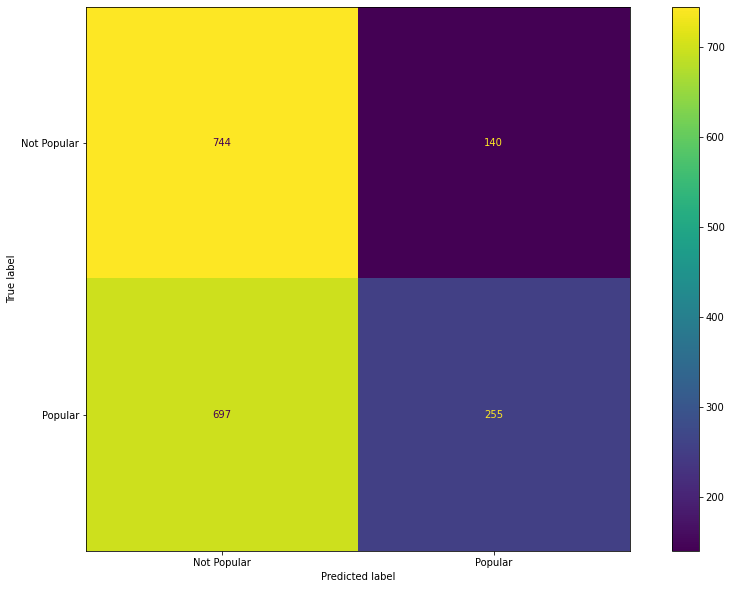

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, gaussian_model_prediction, labels=gaussian_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian_model.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (15,10)

***
### K-Nearest Neighbors

In [85]:
from sklearn.model_selection import train_test_split

# Split both X and y into the new training and test sets.
# This takes advantage of Pythons powerful assignment chaining and implicit tuple unpacking.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [86]:
# note that 'stratify' is set to yes - this ensures that the sets contain the correct amount of each possible
# target value. A stratified sample helps to ensure precision 

# The next step is to build our model - we are using the scikit learn KNN classifier
from sklearn.neighbors import KNeighborsClassifier

scikit_knn = KNeighborsClassifier(n_neighbors = 100)

# now need to fit the classifier to the data
#
scikit_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

#### The n_neighbours parameter sets the number of items nearest to the new data we are trying to predict.
#### KNN then classifies the new point based on a majority vote system - whichever category gets at least 2 votes 
#### is the category the item will fall into. The neighbours are decided by distance from the new data point

In [87]:
# Now we have trained our model we can see how it performs on our test data 
# Start by looking at the first few predictions

#show first 5 model predictions on the test data
scikit_knn.predict(X_test)[0:5]

array(['Popular', 'Popular', 'Popular', 'Popular', 'Popular'],
      dtype=object)

#### Now we can check the accuracy of our model on the test data.
#### Remember we have the real data so we can compare actual results against our predictions.

In [88]:
# Check accuracy of our model on the test data
scikit_knn.score(X_test, y_test)

0.5588235294117647

#### So our model predicts the outcome with an accuracy of 67%
#### Which is a little disappointing... it could be that we need more neighbors.

#### First of all we do some cross-validation - randomly split the data into different groups and then run the process on each of those groups (we split into k groups which we then run as training and test sets)
#### This means that each of our k-folds gets to be the test set.

In [89]:
from sklearn.model_selection import cross_val_score

# Instead of the train_test_split method which is very blunt we can use cross validation to generate k number
# of accuracy scores and get the mean of them.

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=100)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
# Print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.54738562 0.5373297  0.53841962 0.53787466 0.53841962]
cv_scores mean:0.5398858435290556


#### This shows that each fold produced a different set of predictions but the average of them is 53.9% accurate.

The original number of neighbors used was 100, but was random.\
These types of hyperparameters can be tuned so that optimum value is found.\
This can be done using grid search techniques - where a range of parameters is tried ona cross validation model - so not only are the test and training data tuned the number of neighbors will also bevaried.

In [109]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
scikit_knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors using a numpy array
param_grid = {'n_neighbors': np.arange(1, 200)}

#use gridsearch to test all values for n_neighbors

scikit_knn_gscv = GridSearchCV(scikit_knn2, param_grid, cv=5)

#fit this new model to our data
scikit_knn_gscv.fit(X, y)

# we can find out what the best number of neighbours by using the 'best params' function
scikit_knn_gscv.best_params_

{'n_neighbors': 151}

In [110]:
scikit_knn_gscv.best_params_['n_neighbors']

151

In [111]:
# So if we set n_neighbours to 14 our model will have the best accuracy for this data
# can check the score under this constraint

scikit_knn_gscv.best_score_

0.5445727888491152

In [112]:
# Can validate this easily enough by rerunning the origianl cv model

opt_neighbors = scikit_knn_gscv.best_params_['n_neighbors']

scikit_knn_cv = KNeighborsClassifier(n_neighbors=opt_neighbors)

#train model with cv of 5 (ie 5 groups)
cv_scores = cross_val_score(scikit_knn_cv, X, y, cv=5)

#print each cross validation score (accuracy) and find the mean
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.54466231 0.54059946 0.5400545  0.55149864 0.54604905]
cv_scores mean:0.5445727888491152


<AxesSubplot:>

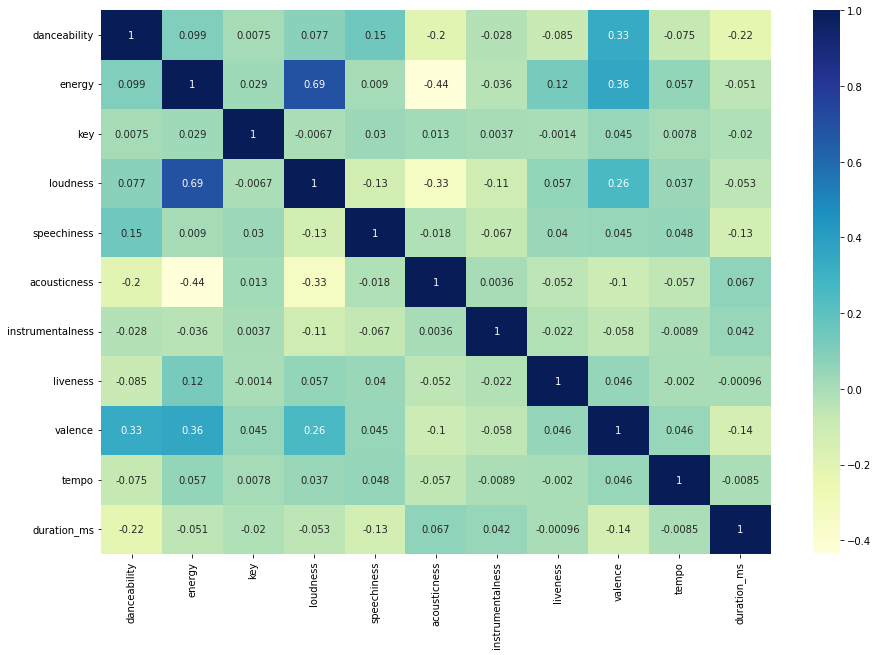

In [114]:
# Create a heatmap

df_corr = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap="YlGnBu")

In [115]:
# Show correlations of Outcome vs. other column values.

df_corr['Popular']

KeyError: 'Popular'